In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Sample student dataset: Replace with your actual dataset
data = {
    'Year': [2020, 2020, 2021, 2021, 2022, 2022],
    'Subject': ['Math', 'Science', 'Math', 'Science', 'Math', 'Science'],
    'Hours_Studied': [5, 4, 6, 5, 4, 5],
    'Grade': [85, 80, 90, 85, 88, 82]
}
df = pd.DataFrame(data)

# Preprocess data: handle missing values and encode categorical variables
numeric_features = ['Hours_Studied']
categorical_features = ['Year', 'Subject']

# Pipeline for preprocessing
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split data into training and test sets
X = df.drop(columns=['Grade'])
y = df['Grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model_pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Hours_Studied']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Year', 'Subject'])])),
                ('regressor', LinearRegression())])

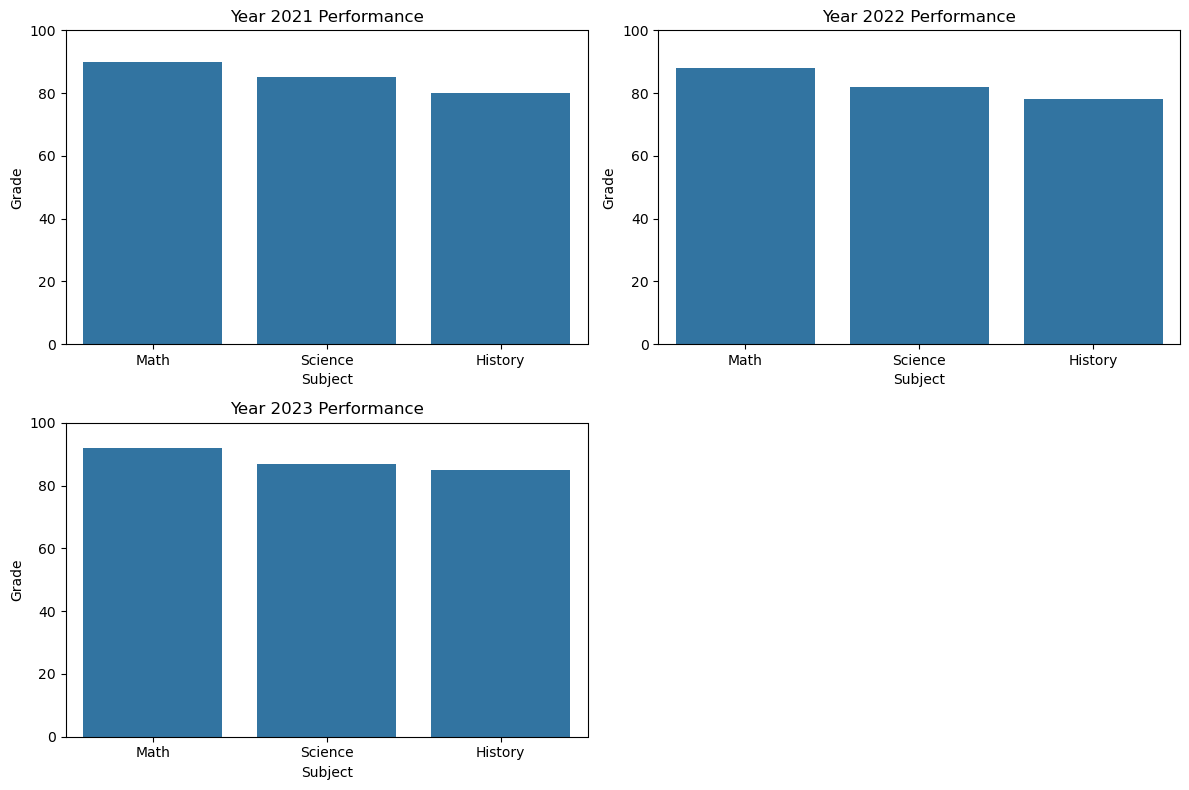

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for yearly student performance: Replace with your actual data
data = {
    'Year': [2021, 2021, 2021, 2022, 2022, 2022, 2023, 2023, 2023],
    'Subject': ['Math', 'Science', 'History', 'Math', 'Science', 'History', 'Math', 'Science', 'History'],
    'Grade': [90, 85, 80, 88, 82, 78, 92, 87, 85]
}
df_performance = pd.DataFrame(data)

# Plotting yearly student performance across subjects
plt.figure(figsize=(12, 8))
years = df_performance['Year'].unique()

for i, year in enumerate(years):
    plt.subplot(2, 2, i+1)
    sns.barplot(x='Subject', y='Grade', data=df_performance[df_performance['Year'] == year])
    plt.title(f'Year {year} Performance')
    plt.ylim(0, 100)
    plt.xlabel('Subject')
    plt.ylabel('Grade')

plt.tight_layout()
plt.show()
